In [1]:
!python3 --version

Python 3.7.12


### Imports

In [2]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Project files
DATASET_DIR = Path('/content/drive/MyDrive/Mini_Project_II/dataset')
TRAINING_DIR = os.path.join(DATASET_DIR,'Training')

In [5]:
# Video Paths
TRAINING_CLIPS = os.path.join(TRAINING_DIR,'training_data')

In [6]:
# Dataset CSV Paths
# /content/drive/MyDrive/Mini_Project_II/dataset/Dataset_ComicMischief_Training_Scene_Binary_Annotations.csv

multiclass_csv = os.path.join(DATASET_DIR,'Dataset_ComicMischief_Training_Scene_Multiclass_Annotations.csv')
binary_csv = os.path.join(DATASET_DIR,'Dataset_ComicMischief_Training_Scene_Binary_Annotations.csv')

## About Training Dataset

- Video based dataset
- Each video is divided into *n* no. of frames
- Total videos : 347
- Dataset shape : (998,10)


### Binary Annotation Dataset

In [7]:
ds_b = pd.read_csv(binary_csv)
ds_b.head()

,Video ID,Video URL,Scene_ID,Original Video Codec,Original Video Resolution,Original Video Avg Framerate,Presence of Comic Mischief Content in Scene
0,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,0,h264,640 x 360,25.00000,1
1,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,1,h264,640 x 360,25.00000,1
2,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,2,h264,640 x 360,25.00000,1
3,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,0,h264,640 x 360,29.97003,1
4,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,1,h264,640 x 360,29.97003,1


#### Columns & Size

In [8]:
# columns
ds_b.columns

Index(['Video ID', 'Video URL', 'Scene_ID', 'Original Video Codec',
       'Original Video Resolution', 'Original Video Avg Framerate',
       'Presence of Comic Mischief Content in Scene'],
      dtype='object')

In [9]:
# Shape from dataset
ds_b.shape

(998, 7)

In [10]:
# No of unique videos
len(set(ds_b['Video ID']))

347

#### Cleaning the dataset by removing the no video data

In [11]:
for index,val in ds_b.iterrows():
    if val['Scene_ID'] < 10:
        filename = f"{val['Video ID']}.0{val['Scene_ID']}.mp4"
    else:
        filename = f"{val['Video ID']}.{val['Scene_ID']}.mp4"

    filePath = os.path.join(TRAINING_CLIPS,filename)
    if not os.path.exists(filePath):
        print(f'{filename[:-4]} not found. Removing entry from data')
        ds_b.drop(index,inplace=True)

# Shape from Dataset
print(ds_b.shape)
# No of Unique Videos
print(len(set(ds_b['Video ID'])))

tt0493405.00 not found. Removing entry from data
tt0493405.01 not found. Removing entry from data
tt0493405.02 not found. Removing entry from data
kCppUtS9vLk.00 not found. Removing entry from data
kCppUtS9vLk.01 not found. Removing entry from data
EbcfiIeH63M.00 not found. Removing entry from data
EbcfiIeH63M.01 not found. Removing entry from data
EbcfiIeH63M.02 not found. Removing entry from data
pxxPznV38Hk.00 not found. Removing entry from data
pxxPznV38Hk.01 not found. Removing entry from data
pxxPznV38Hk.02 not found. Removing entry from data
1yhNm_8q07g.00 not found. Removing entry from data
1yhNm_8q07g.01 not found. Removing entry from data
1yhNm_8q07g.02 not found. Removing entry from data
(984, 7)
342


In [12]:
ds_b['Video_Scene ID'] = ds_b['Video ID'].astype(str) +'_' + ds_b['Scene_ID'].astype(str)
ds_b.head()

,Video ID,Video URL,Scene_ID,Original Video Codec,Original Video Resolution,Original Video Avg Framerate,Presence of Comic Mischief Content in Scene,Video_Scene ID
0,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,0,h264,640 x 360,25.00000,1,v6IyejLa35s_0
1,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,1,h264,640 x 360,25.00000,1,v6IyejLa35s_1
2,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,2,h264,640 x 360,25.00000,1,v6IyejLa35s_2
3,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,0,h264,640 x 360,29.97003,1,uThDGzLhOXg_0
4,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,1,h264,640 x 360,29.97003,1,uThDGzLhOXg_1


#### Count Plot of Presence of Comic Mischief Content in Scene

In [16]:
grouped_ds = ds_b.groupby(by=['Presence of Comic Mischief Content in Scene'])
true_df = grouped_ds.get_group(1)
false_df = grouped_ds.get_group(0)

print('True : ', true_df.shape)
print('False : ', false_df.shape)

True :  (688, 8)
False :  (296, 8)


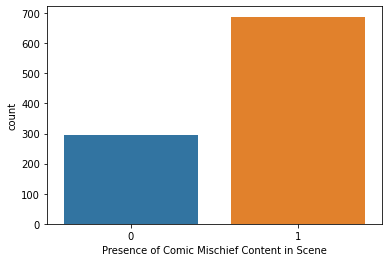

In [13]:
import seaborn as sns

sns.countplot(x='Presence of Comic Mischief Content in Scene',data=ds_b)

### Multiclass Annotation Dataset


In [16]:
ds_m = pd.read_csv(multiclass_csv)
ds_m.head()

,Video ID,Video URL,Scene_ID,Original Video Codec,Original Video Resolution,Original Video Avg Framerate,Mature Humor - Scene Annotation,Slapstick Humor - Scene Annotation,Gory Humor - Scene Annotation,Sarcasm - Scene Annotation
0,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,0,h264,640 x 360,25.00000,1,0,1,0
1,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,1,h264,640 x 360,25.00000,1,0,1,0
2,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,2,h264,640 x 360,25.00000,1,0,1,0
3,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,0,h264,640 x 360,29.97003,1,0,0,0
4,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,1,h264,640 x 360,29.97003,1,0,0,0


#### Columns & Shape of dataset

In [17]:
# Columns
ds_m.columns

Index(['Video ID', 'Video URL', 'Scene_ID', 'Original Video Codec',
       'Original Video Resolution', 'Original Video Avg Framerate',
       'Mature Humor - Scene Annotation', 'Slapstick Humor - Scene Annotation',
       'Gory Humor - Scene Annotation', 'Sarcasm - Scene Annotation'],
      dtype='object')

In [18]:
# Shape of dataset
ds_m.shape

(998, 10)

In [19]:
# No of videos
len(set(ds_m['Video ID']))

347

#### Cleaning the dataset by removing the no video data

In [20]:
for index,val in ds_m.iterrows():
    if val['Scene_ID'] < 10:
        filename = f"{val['Video ID']}.0{val['Scene_ID']}.mp4"
    else:
        filename = f"{val['Video ID']}.{val['Scene_ID']}.mp4"

    filePath = os.path.join(TRAINING_CLIPS,filename)
    if not os.path.exists(filePath):
        print(f'{filename[:-4]} not found. Removing entry from data')
        ds_m.drop(index,inplace=True)

# Shape from Dataset
print(ds_m.shape)
# No of Unique Videos
print(len(set(ds_m['Video ID'])))

tt0493405.00 not found. Removing entry from data
tt0493405.01 not found. Removing entry from data
tt0493405.02 not found. Removing entry from data
kCppUtS9vLk.00 not found. Removing entry from data
kCppUtS9vLk.01 not found. Removing entry from data
EbcfiIeH63M.00 not found. Removing entry from data
EbcfiIeH63M.01 not found. Removing entry from data
EbcfiIeH63M.02 not found. Removing entry from data
pxxPznV38Hk.00 not found. Removing entry from data
pxxPznV38Hk.01 not found. Removing entry from data
pxxPznV38Hk.02 not found. Removing entry from data
1yhNm_8q07g.00 not found. Removing entry from data
1yhNm_8q07g.01 not found. Removing entry from data
1yhNm_8q07g.02 not found. Removing entry from data
(984, 10)
342


In [21]:
ds_m['Video_Scene ID'] = ds_m['Video ID'].astype(str) + ds_m['Scene_ID'].astype(str)
ds_m.head()

,Video ID,Video URL,Scene_ID,Original Video Codec,Original Video Resolution,Original Video Avg Framerate,Mature Humor - Scene Annotation,Slapstick Humor - Scene Annotation,Gory Humor - Scene Annotation,Sarcasm - Scene Annotation,Video_Scene ID
0,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,0,h264,640 x 360,25.00000,1,0,1,0,v6IyejLa35s0
1,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,1,h264,640 x 360,25.00000,1,0,1,0,v6IyejLa35s1
2,v6IyejLa35s,https://www.youtube.com/watch?v=v6IyejLa35s,2,h264,640 x 360,25.00000,1,0,1,0,v6IyejLa35s2
3,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,0,h264,640 x 360,29.97003,1,0,0,0,uThDGzLhOXg0
4,uThDGzLhOXg,https://www.youtube.com/watch?v=uThDGzLhOXg,1,h264,640 x 360,29.97003,1,0,0,0,uThDGzLhOXg1


In [22]:
import seaborn as sns

#### Mature Humor - Scene Annotation Count Plot

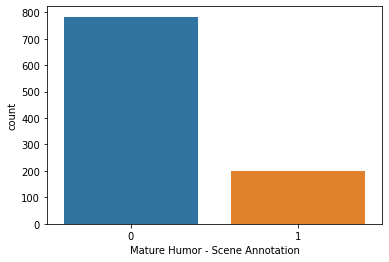

In [23]:
sns.countplot(x='Mature Humor - Scene Annotation',data=ds_m)

#### Slapstick Humor - Scene Annotation Count Plot

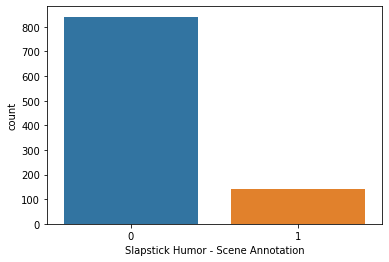

In [24]:
sns.countplot(x='Slapstick Humor - Scene Annotation',data=ds_m)

#### Gory Humor - Scene Annotation Count Plot

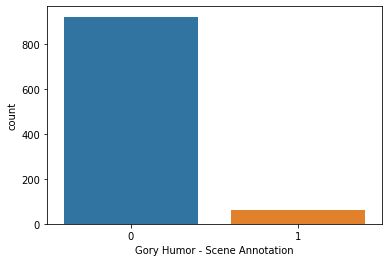

In [25]:
sns.countplot(x='Gory Humor - Scene Annotation',data=ds_m)

#### Sarcasm - Scene Annotation Countplot

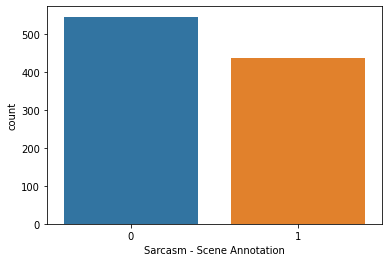

In [31]:
sns.countplot(x='Sarcasm - Scene Annotation',data=ds_m)

In [27]:
y = ds_m.iloc[:,-4:]
y.head(2)

,Slapstick Humor - Scene Annotation,Gory Humor - Scene Annotation,Sarcasm - Scene Annotation,Video_Scene ID
0,0,1,0,v6IyejLa35s0
1,0,1,0,v6IyejLa35s1


### Handling Imbalance dataset (Binary Data)

In [28]:
grouped_ds = ds_b.groupby(by=['Presence of Comic Mischief Content in Scene'])

In [29]:
false_df = grouped_ds.get_group(0)
false_df.shape

(296, 8)

In [30]:
true_df =  grouped_ds.get_group(1)
true_df.shape

(688, 8)

In [ ]:
!pip install vidaug

In [ ]:
# Handling video imbalance
import imgaug as ia
import imageio
from imgaug import augmenters as iaa
import shutil
import random
import time
from vidaug import augmentors as va
from multiprocessing import Pool
import concurrent.futures

from tqdm import tqdm
import cv2 as cv
import numpy as np

In [ ]:
# Applying first set of Augmentation (Only RandomRotate)

# for idx,val in tqdm(false_df.iterrows(),total=false_df.shape[0]):
#     if val['Scene_ID'] < 10:
#         filename = f"{val['Video ID']}.0{val['Scene_ID']}.mp4"
#     else:
#         filename = f"{val['Video ID']}.{val['Scene_ID']}.mp4"
#     filePath = os.path.join(TRAINING_CLIPS,filename)



In [ ]:
sometimes = lambda aug: va.Sometimes(0.5,aug)
seq = va.Sequential([
            sometimes(va.RandomCrop(size=(224,224))),
            sometimes(va.RandomRotate(degrees=10)),
            sometimes(va.VerticalFlip()),
            sometimes(va.HorizontalFlip())
            # sometimes(va.GaussianBlur(1.5))    
        ]) 

In [ ]:
def crop_center_square(frame):
    y,x = frame.shape[0:2]
    min_dim = min(y,x)

    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y: start_y + min_dim, start_x:start_x + min_dim]

def load_video(path, max_frames=0):
    cap = cv.VideoCapture(path)
    frames = []
    try:
        while True:
            ret,frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv.resize(frame,(224,224))
            frame = frame[:,:,[2,1,0]]
            frames.append(frame)

            if len(frame) == max_frames:
                break
    finally:
        cap.release()
    
    return np.array(frames)

In [ ]:
def augment_video(df):
    for idx,val in tqdm(df.iterrows(),total=df.shape[0]):
        if val['Scene_ID'] < 10:
            filename = f"{val['Video ID']}.0{val['Scene_ID']}.mp4"
        else:
            filename = f"{val['Video ID']}.{val['Scene_ID']}.mp4"
        
        filepath = os.path.join(TRAINING_CLIPS,filename)
        
        # X.append(load_video(filepath))
        # labels.append(val['Presence of Comic Mischief Content in Scene'])
        print(f"{idx} : " , load_video(filepath).shape)
    # return np.array(X) , np.array(labels)

In [ ]:
!pip install imageio_ffmpeg

     |████████████████████████████████| 26.9 MB 103 kB/s 


In [ ]:
imageio.show_formats()

TIFF - TIFF format [.tif, .tiff, .stk, .lsm]
BMP-PIL - Windows Bitmap [.bmp]
BUFR-PIL - BUFR [.bufr]
CUR-PIL - Windows Cursor [.cur]
DCX-PIL - Intel DCX [.dcx]
DDS-PIL - DirectDraw Surface [.dds]
DIB-PIL - Windows Bitmap []
EPS-PIL - Encapsulated Postscript [.ps, .eps]
FITS-PIL - FITS [.fit, .fits]
FLI-PIL - Autodesk FLI/FLC Animation [.fli, .flc]
FPX-PIL - FlashPix [.fpx]
FTEX-PIL - Texture File Format (IW2:EOC) [.ftc, .ftu]
GBR-PIL - GIMP brush file [.gbr]
GIF-PIL - Static and animated gif (Pillow) [.gif]
GRIB-PIL - GRIB [.grib]
HDF5-PIL - HDF5 [.h5, .hdf]
ICNS-PIL - Mac OS icns resource [.icns]
ICO-PIL - Windows Icon [.ico]
IM-PIL - IFUNC Image Memory [.im]
IMT-PIL - IM Tools []
IPTC-PIL - IPTC/NAA [.iim]
JPEG-PIL - JPEG (ISO 10918) [.jfif, .jpe, .jpg, .jpeg]
JPEG2000-PIL - JPEG 2000 (ISO 15444) [.jp2, .j2k, .jpc, .jpf, .jpx, .j2c]
MCIDAS-PIL - McIdas area file []
MIC-PIL - Microsoft Image Composer [.mic]
MPO-PIL - MPO (CIPA DC-007) [.mpo]
MSP-PIL - Windows Paint [.msp]
PCD-PIL - Ko

In [ ]:
import imageio_ffmpeg as imgf

In [ ]:
test = imgf.read_frames(path=filepath)

In [ ]:
seq = iaa.Sequential([
                      iaa.Fliplr(flip),
                      iaa.Affine(rotate=rotation_angle)
])

generator

In [ ]:
def augment_video(filepath,new_filename,output_folder_path):

    cap = cv.VideoCapture(filepath)
    fps = cap.get(cv.CAP_PROP_FPS)
    w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))


    # filename,ext = filepath.split('/')[-1].split('.')
    # filename = newfilename
    new_filepath = os.path.join(output_folder_path,f'{new_filename}.mp4')

    fourcc = 'mp4v'
    video_writer = cv.VideoWriter(new_filepath,cv.VideoWriter_fourcc(*fourcc),fps,(w,h))

    # frames = load_video(filepath)
    # aug_vid = seq(frames)

    rotation_angle = random.randint(-10,10)
    
    seq = iaa.Sequential([
                iaa.Affine(rotate=rotation_angle)
                ])

    while cap.isOpened():
        ret,frame = cap.read()
        if not ret:
            break
        
        img_aug = seq(image=frame)
        video_writer.write(img_aug)

    
    # imageio.mimsave(new_filepath+'.mp4',aug_vid,fps)

    # while video_writer.isOpened():
    # for frame in np.array(aug_vid):
    #     frame = np.uint8(frame)
    #     video_writer.write(frame)
        

    # try:
    #     while cap.isOpened():
    #         ret,frame = cap.read()
    #         if not ret:
    #             break
    #         img_aug = seq(frame)
    #         video_writer.write(img_aug)
    
    cv.destroyAllWindows()
    video_writer.release()
    cap.release()

In [ ]:
OUTPUT_FOLDER = ''

In [ ]:
for idx,val in tqdm(false_df.head().iterrows(),total=false_df.head().shape[0]):
    if val['Scene_ID'] < 10:
        filename = f"{val['Video ID']}.0{val['Scene_ID']}.mp4"
    else:
        filename = f"{val['Video ID']}.{val['Scene_ID']}.mp4"
    
    filepath = os.path.join(TRAINING_CLIPS,filename)

    filename = filepath.split('/')[-1][:-4]
    filename = filename + ".1"

    augment_video(filepath,filename,OUTPUT_FOLDER)


100%|██████████| 5/5 [01:11<00:00, 14.36s/it]


In [ ]:
filepath.split('/')[-1][:-4]

'tt8366502.02'

In [ ]:
test = load_video(filepath)

In [ ]:
test.shape

(564, 224, 224, 3)

In [ ]:
aug_vid =  seq(test)

In [ ]:
cap = cv.VideoCapture(filepath)
fps = int(cap.get(cv.CAP_PROP_FPS))
w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))


fourcc = 'mp4v'
video_writer = cv.VideoWriter('test',cv.VideoWriter_fourcc(*fourcc),fps,(w,h))

for frame in aug_vid:
    video_writer.write(frame)

cv.destroyAllWindows()
video_writer.release()